In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import cm
from matplotlib.colors import LightSource
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FixedLocator

from qutip import displace, destroy

In [2]:
# SPACS
data1 = np.loadtxt(r"Density_matrixes\spacs_DM3.txt", dtype=np.complex128)
data1_cs = np.loadtxt(r"Density_matrixes\cs_DM1.txt", dtype=np.complex128)
# TPACS
data2 = np.loadtxt(r"Density_matrixes\tpacs_DM2.txt", dtype=np.complex128)
data2_cs = np.loadtxt(r"Density_matrixes\cs_DM2.txt", dtype=np.complex128)
# 3PACS
data3 = np.loadtxt(r"Density_matrixes\3pacs_DM2.txt", dtype=np.complex128)
data3_cs = np.loadtxt(r"Density_matrixes\cs_DM3.txt", dtype=np.complex128)

In [3]:
# Definition of displacement
def my_displacement(rho,alpha):
    N = len(rho[:])
    return displace(N,alpha)*rho*displace(N,alpha).dag()
    
def calculate_complex_amplitude(rho):
    # [:] is present in case you input qutip Qobj which does not have defined length
    a = destroy(len(rho[:]))
    return np.trace(np.dot(rho,a))

# Visualize density matrixes as bar plots

In [25]:
def bar_plot_v2(Matrix1,Matrix2,Matrix3,barsize = 0.8,azim=-45,dist=8.5,elev=22,
                edgewidth=0.5,
                space=3.0,padx=0,pady=2,padz=5,labelpad=0,nbins=4,fontsize = 16,fonttype="",
                axislabels=None, cmap=plt.cm.RdYlBu_r,saveas="",dpi = 150):
    """
    Plotting of 3 density matrixes in one row as 3d bar plot.
    Matrix: desity matrix of our state
    
    space: decimal number
        Definition of space between subplots.
    
    padx, pady, padz : integer
        Space between tick and tick labels
        
    fontsize : integer
        Defines the size of the font of labels and axis ticks
        
    fonttype: str
        Defines the type of the font of labels and axis ticks
    
    axislabels: None or True
        Visualisation of axis labels
        
    """
    c_0=-15
    c_inc=35
    
    c_0=10
    c_inc=20
    
    plt.rcParams['text.usetex'] = True
    #fontsize = 24
    
    grid_ls='-'
    grid_lw=0.8
    
    # Data generation
    data1 = np.real(Matrix1)
    dim1 = len(data1)
    x1 = np.arange(0, dim1)
    p1 = np.arange(0, dim1)
    T1, A1 = np.meshgrid(x1, p1)
    
    data2 = np.real(Matrix2)
    dim2 = len(data2)
    x2 = np.arange(0, dim2)
    p2 = np.arange(0, dim2)
    T2, A2 = np.meshgrid(x2, p2)
    
    
    data3 = np.real(Matrix3)
    dim3 = len(data3)
    x3 = np.arange(0, dim3)
    p3 = np.arange(0, dim3)
    T3, A3 = np.meshgrid(x3, p3)
    
    if fonttype !="":
        plt.rcParams["font.family"] = f'{fonttype}'
    
    # set up a figure twice as wide as it is tall
    fig = plt.figure(figsize=plt.figaspect(0.30), dpi=dpi)
    
    # ======================
    # Plotting first subplot
    #=======================
    ax = fig.add_subplot(1, 3, 1, projection='3d')

    Xi1 = T1.flatten()
    Yi1 = A1.flatten()
    Zi1 = np.zeros(data1.size)

    dx1 = barsize * np.ones(data1.size)
    dy1 = barsize * np.ones(data1.size)
    dz1 = data1.flatten()
    
    c_ls=[]
    c=c_0
    for j in range(dim3):
        c+=c_inc
        for i in range(dim3):
            c_ls.append(c)
    rgba1 = cmap(c_ls)  
    
    ax.bar3d(Xi1, Yi1, Zi1, dx1, dy1, dz1,shade=True, color = rgba1,
             edgecolor='k',linewidth=edgewidth, alpha=1)
    
    ax.spines['left']
    
    ax.tick_params('x', labelsize=fontsize, pad=padx)
    ax.tick_params('y', labelsize=fontsize, pad=pady)
    ax.tick_params('z', labelsize=fontsize, pad=padz)
    
    ax.xaxis.set_major_locator(MaxNLocator(integer=True,nbins=nbins))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True,nbins=nbins))
    
    ax.xaxis._axinfo["grid"].update({"linewidth":grid_lw,'linestyle':grid_ls,'color':'k'})
    ax.yaxis._axinfo["grid"].update({"linewidth":grid_lw,'linestyle':grid_ls,'color':'k'})
    ax.zaxis._axinfo["grid"].update({"linewidth":grid_lw,'linestyle':grid_ls,'color':'k'})
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')
    
    if axislabels:
        ax.set_ylabel(r"$k$", fontsize=fontsize+4)
        ax.set_xlabel(r"$j$", fontsize=fontsize+4)
        ax.set_zlabel(r"$\rho_{jk}$",fontsize=fontsize+4,labelpad=labelpad)
    
    ax.azim = azim
    ax.dist = dist
    ax.elev = elev
    
    # =======================
    # Plotting second subplot
    # =======================
    ax = fig.add_subplot(1, 3, 2, projection='3d')

    Xi2 = T2.flatten()
    Yi2 = A2.flatten()
    Zi2 = np.zeros(data2.size)

    dx2 = barsize * np.ones(data2.size)
    dy2 = barsize * np.ones(data2.size)
    dz2 = data2.flatten()
    
    c_ls=[]
    c=c_0
    for j in range(dim3):
        c+=c_inc
        for i in range(dim3):
            c_ls.append(c)
    rgba2 = cmap(c_ls)

    ax.bar3d(Xi2, Yi2, Zi2, dx2, dy2, dz2, color = rgba2,edgecolor='k',linewidth=edgewidth)
    ax.spines['left']
    
    ax.tick_params('x', labelsize=fontsize, pad=padx)
    ax.tick_params('y', labelsize=fontsize, pad=pady)
    ax.tick_params('z', labelsize=fontsize, pad=padz)
    
    ax.xaxis.set_major_locator(MaxNLocator(integer=True,nbins=nbins))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True,nbins=nbins))
    
    ax.xaxis._axinfo["grid"].update({"linewidth":grid_lw,'linestyle':grid_ls,'color':'k'})
    ax.yaxis._axinfo["grid"].update({"linewidth":grid_lw,'linestyle':grid_ls,'color':'k'})
    ax.zaxis._axinfo["grid"].update({"linewidth":grid_lw,'linestyle':grid_ls,'color':'k'})
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')
        
    if axislabels:
        ax.set_ylabel(r"$k$", fontsize=fontsize+4)
        ax.set_xlabel(r"$j$", fontsize=fontsize+4)
        ax.set_zlabel(r"$\rho_{jk}$",fontsize=fontsize+4,labelpad=labelpad)
        
    ax.azim = azim
    ax.dist = dist
    ax.elev = elev
    
    # =======================
    # Plotting third subplot
    # =======================
    ax = fig.add_subplot(1, 3, 3, projection='3d')

    Xi3 = T3.flatten()
    Yi3 = A3.flatten()
    Zi3 = np.zeros(data3.size)

    dx3 = barsize * np.ones(data3.size)
    dy3 = barsize * np.ones(data3.size)
    dz3 = data3.flatten()

    c_ls=[]
    c=c_0
    for j in range(dim3):
        c+=c_inc
        for i in range(dim3):
            c_ls.append(c)
            
    rgba3 = cmap(c_ls)

    ax.bar3d(Xi3, Yi3, Zi3, dx3, dy3, dz3, color = rgba3,edgecolor='k',linewidth=edgewidth)
    ax.spines['left']
    
    ax.tick_params('x', labelsize=fontsize, pad=padx)
    ax.tick_params('y', labelsize=fontsize, pad=pady)
    ax.tick_params('z', labelsize=fontsize, pad=padz)
    
    '''!!Check!!'''
    ax.set_zticks([0,0.3,0.6])
    
    ax.xaxis.set_major_locator(MaxNLocator(integer=True,nbins=nbins))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True,nbins=nbins))
     
    ax.xaxis._axinfo["grid"].update({"linewidth":grid_lw,'linestyle':grid_ls,'color':'k'})
    ax.yaxis._axinfo["grid"].update({"linewidth":grid_lw,'linestyle':grid_ls,'color':'k'})
    ax.zaxis._axinfo["grid"].update({"linewidth":grid_lw,'linestyle':grid_ls,'color':'k'})
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')
        
    if axislabels:
        ax.set_ylabel(r"$k$", fontsize=fontsize+4)
        ax.set_xlabel(r"$j$", fontsize=fontsize+4)
        ax.set_zlabel(r"$\rho_{jk}$",fontsize=fontsize+4,labelpad=labelpad)
    
    ax.azim = azim
    ax.dist = dist
    ax.elev = elev
    
    fig.tight_layout(pad=3.0)
    
    if saveas !="":
        plt.savefig(f'{saveas}', dpi=dpi)

<IPython.core.display.Javascript object>


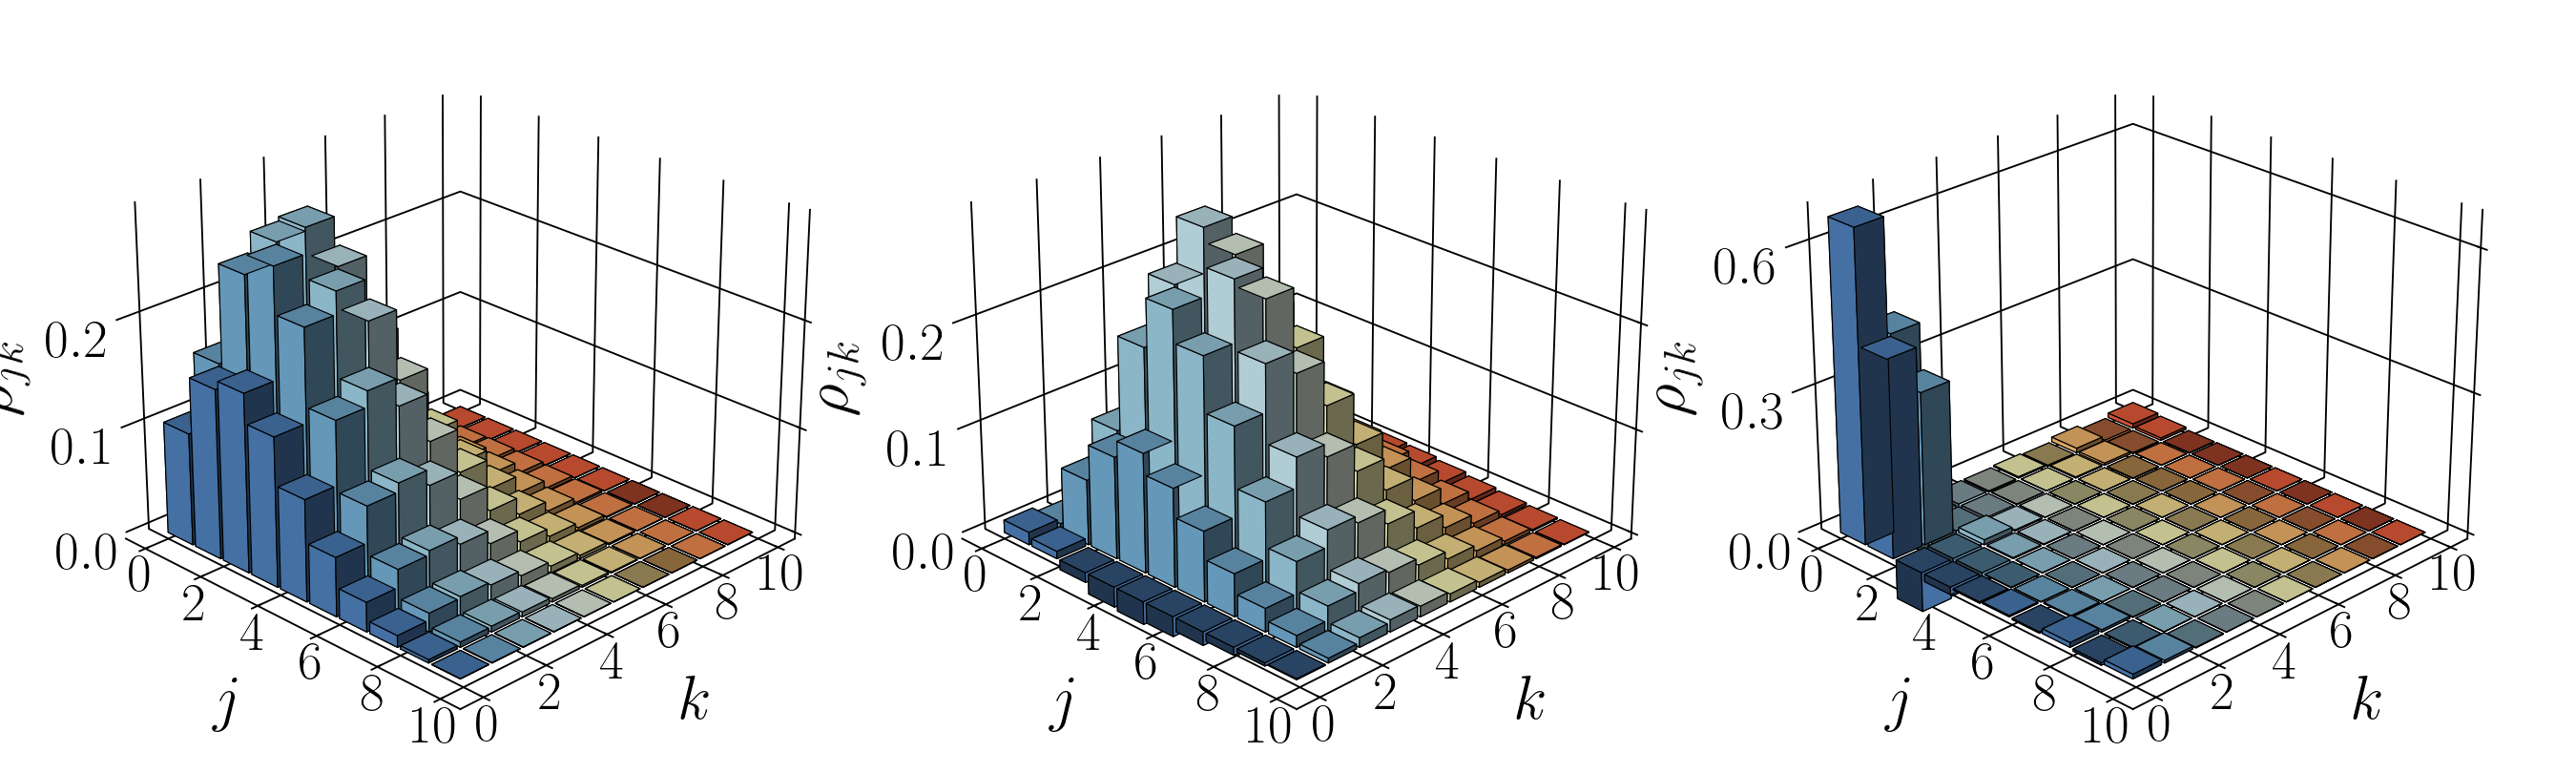

In [5]:
# Empty string will cause the script not to save the figure.
# If you want to save the figure, fill in the file name and the file type (i.e. .png, .svg)
filename = ""

plt_dim=10
displ1 = calculate_complex_amplitude(data1_cs)

%matplotlib notebook
bar_plot_v2(data1_cs[:plt_dim,:plt_dim],data1[:plt_dim,:plt_dim],my_displacement(data1[:plt_dim,:plt_dim],-displ1),
            barsize=0.9,padz=-165,pady=-6,padx=-6,labelpad=-195,space=10.0,
            fontsize=24,nbins=6,azim=-45,elev=25,cmap=plt.cm.RdYlBu_r,
            axislabels=True,saveas = filename)

<IPython.core.display.Javascript object>


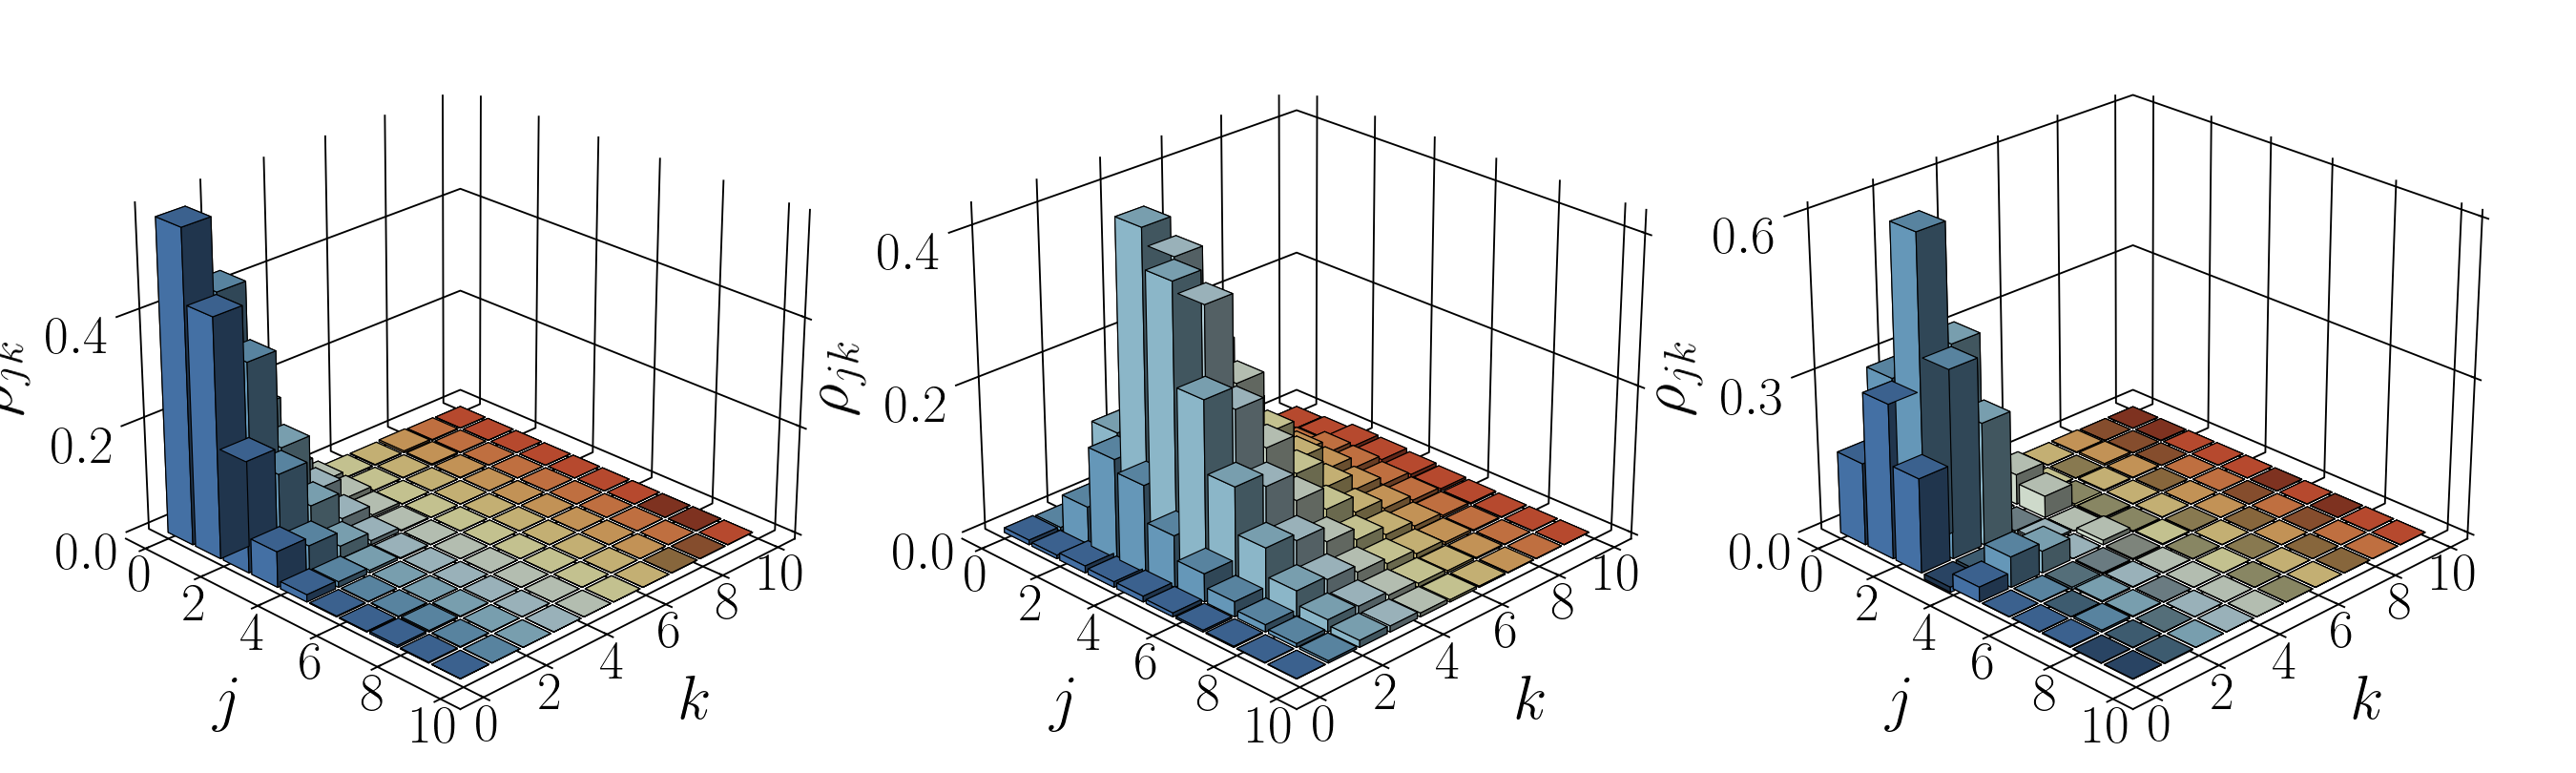

In [7]:
# Empty string will cause the script not to save the figure.
# If you want to save the figure, fill in the file name and the file type (i.e. .png, .svg)
filename = ""

plt_dim=10
displ2 = calculate_complex_amplitude(data2_cs)

%matplotlib notebook
bar_plot_v2(data2_cs[:plt_dim,:plt_dim],data2[:plt_dim,:plt_dim],my_displacement(data2[:plt_dim,:plt_dim],-displ2),
            barsize=0.9,padz=-165,pady=-6,padx=-6,labelpad=-195,space=10.0,
            fontsize=24,nbins=6,azim=-45,elev=25,cmap=plt.cm.RdYlBu_r,
            axislabels=True,saveas = filename)

<IPython.core.display.Javascript object>


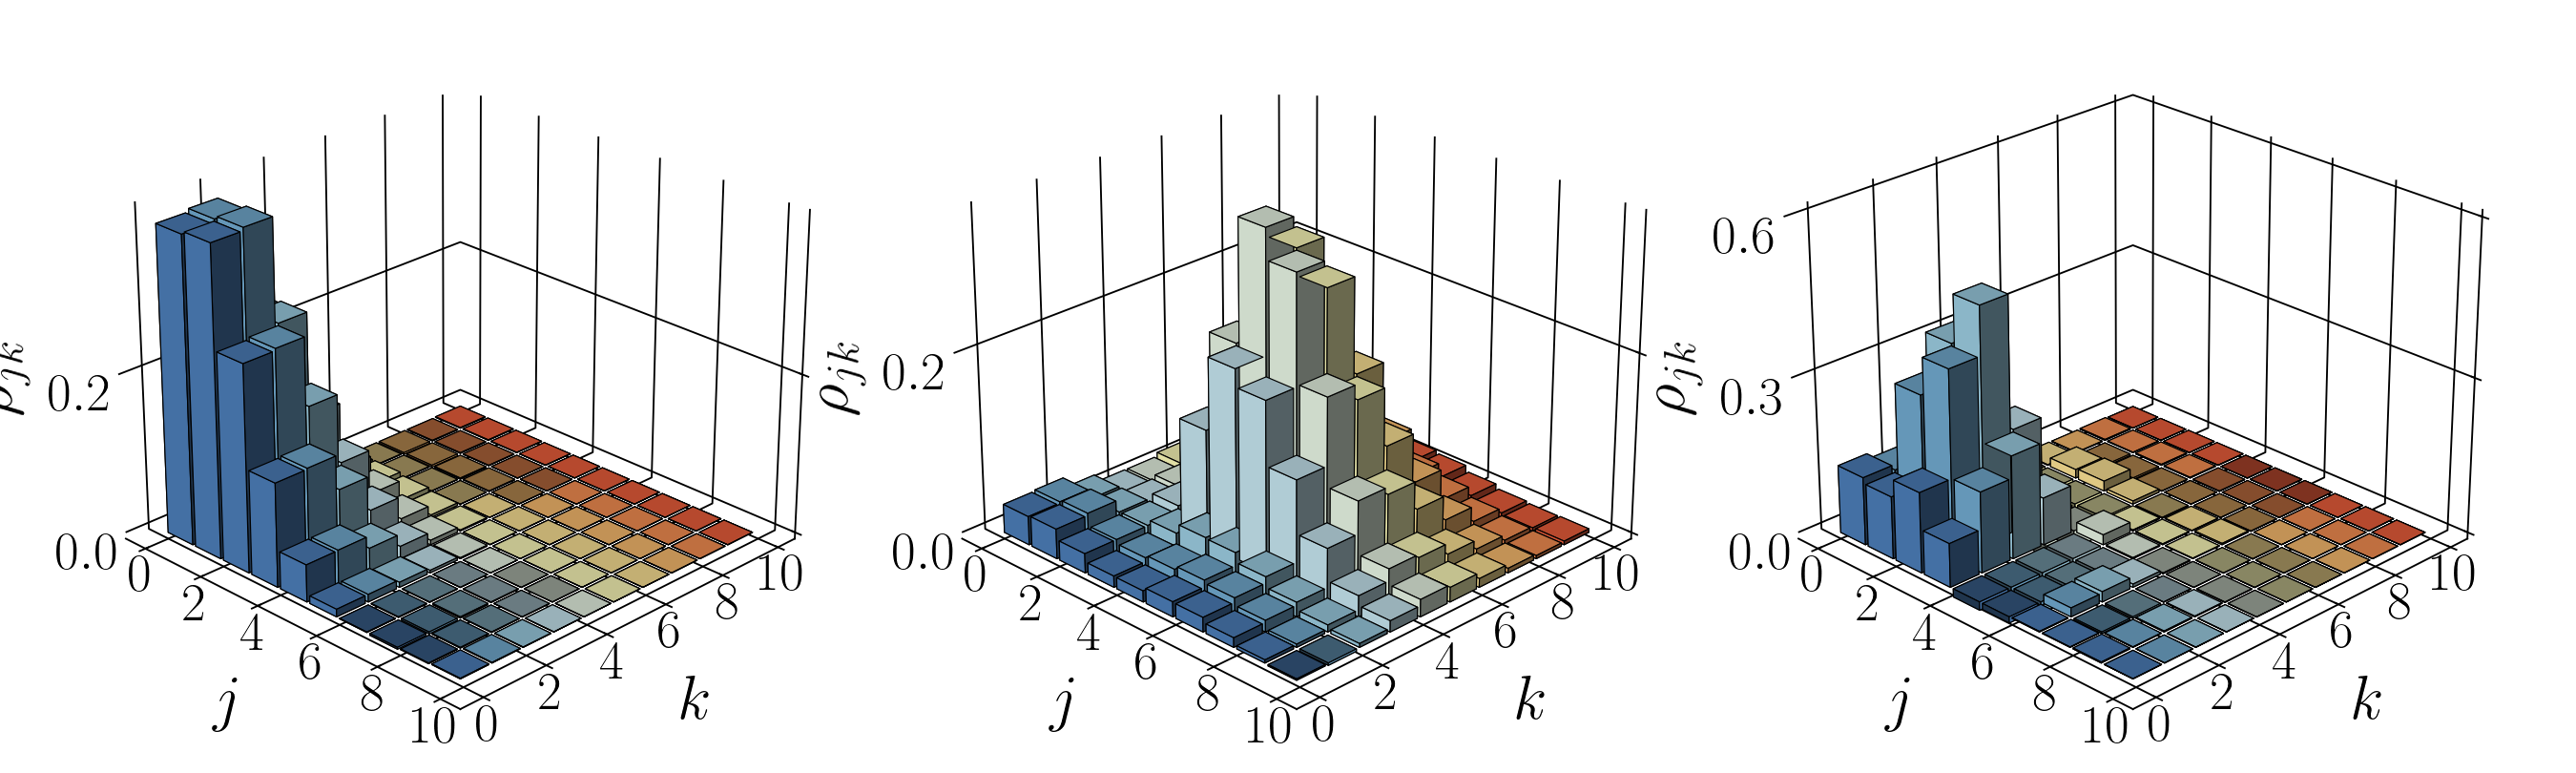

In [8]:
# Empty string will cause the script not to save the figure.
# If you want to save the figure, fill in the file name and the file type (i.e. .png, .svg)
filename = ""

plt_dim=10
displ3 = calculate_complex_amplitude(data3_cs)

%matplotlib notebook
bar_plot_v2(data3_cs[:plt_dim,:plt_dim],data3[:plt_dim,:plt_dim],my_displacement(data3[:plt_dim,:plt_dim],-displ3),
            barsize=0.9,padz=-165,pady=-6,padx=-6,labelpad=-195,space=10.0,
            fontsize=24,nbins=6,azim=-45,elev=25,cmap=plt.cm.RdYlBu_r,
            axislabels=True,saveas = filename)

# Plotting the inserts

In [21]:
def insert_plot(data, dim=10, color = (179/255,179/255,179/255), lw=1.5, label_size=18, pad_x=3, pad_y=2, saveas="",dpi=200):

    data=data
    dim=dim

    dat=np.real(np.diag(data))[0:dim]
    dat_x = list(range(0,len(dat)))
    #print(np.sum(dat))

    col=color

    plt.rcParams['text.usetex'] = True

    lw=lw
    label_size = label_size
    pad_x,pad_y = pad_x,pad_y

    #%matplotlib notebook
    fig, ax = plt.subplots(figsize=(2*1.35*0.8,1.5*1.35*0.8))
    #fig, ax = plt.subplots(figsize=(2*1.35,1.5*1.35))
    ax.bar(dat_x, dat, edgecolor='k',linewidth=1.5, color=col)

    #ax.set_ylim=(0,1)

    ax.set_yticks((0,0.50,1))
    ax.set_xticks((0,2,4,6,8,10))
    #ax.set_xticks((0,2,4))

    ax.tick_params('x', labelsize=label_size, pad=pad_x)
    ax.tick_params('y', labelsize=label_size, pad=pad_y)

    ax.set_ylabel(r"$P_{m}$",fontsize=label_size)
    ax.set_xlabel(r"$m$",fontsize=label_size)

    #plt.setp(ax.spines.values(), lw=lw, color='r')

    plt.tick_params('x',direction='in', length=0, width=lw, colors='k')
    plt.tick_params('y',direction='in', length=6, width=lw, colors='k')
    if saveas !="":
        plt.savefig(filename,dpi=200)

<IPython.core.display.Javascript object>


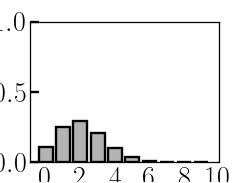

<IPython.core.display.Javascript object>


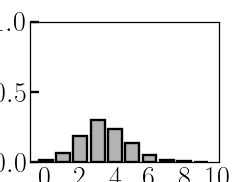

<IPython.core.display.Javascript object>


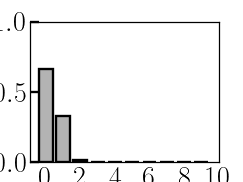

In [23]:
insert_plot(data1_cs)
insert_plot(data1)
insert_plot(my_displacement(data1,-displ1))

<IPython.core.display.Javascript object>


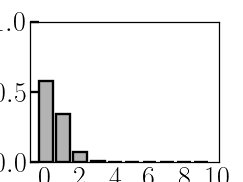

<IPython.core.display.Javascript object>


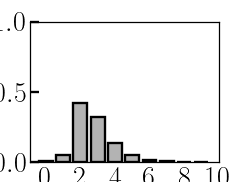

<IPython.core.display.Javascript object>


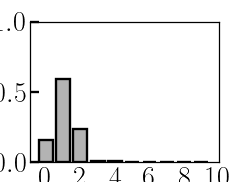

In [22]:
insert_plot(data2_cs)
insert_plot(data2)
insert_plot(my_displacement(data2,-displ2))

<IPython.core.display.Javascript object>


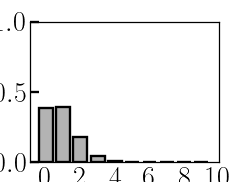

<IPython.core.display.Javascript object>


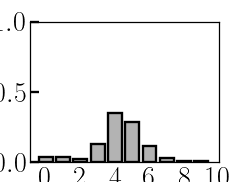

<IPython.core.display.Javascript object>


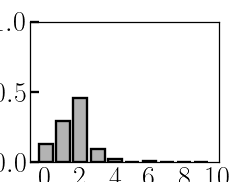

In [24]:
insert_plot(data3_cs)
insert_plot(data3)
insert_plot(my_displacement(data3,-displ3))